# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

In [2]:
def generate_uniform_sections(max_x, max_y, n):
    from random import uniform
    lines = []
    points = set()
    i = 0
    while i < n:
        point_1 = (uniform(0, max_x), uniform(0, max_y))
        point_2 = (uniform(0, max_x), uniform(0, max_y))
        if point_1[0] == point_2[0] or point_1[0] in points or point_2[0] in points:
            continue
        else:
            if point_1[0] < point_2[0]:
                lines.append((point_1, point_2))
            else:
                lines.append((point_2, point_1))
            points.add(point_1[0])
            points.add(point_2[0])
            i += 1
    return lines

In [3]:
section = generate_uniform_sections(0.04,0.04,20)

In [4]:
section1 = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)),
((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)),
((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)),
((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)),
((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)),
((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)),
((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)),
((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)),
((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)),
((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]
section2 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)),
((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)),
((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)),
((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)),
((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
section3 = [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)),
((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)),
((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)),
((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

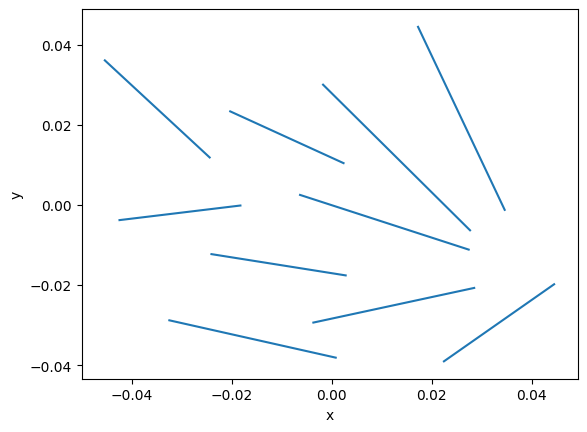

In [5]:
vis = Visualizer()
vis.add_line_segment(section1)
vis.show()

In [6]:
def mat_det_3x3(a, b, c):
    return (a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1])

In [7]:
def orientation(a, b, c, epsilon=10 ** (-12)):
    det = mat_det_3x3(a, b, c)
    if det > epsilon:
        return 1
    elif det < -epsilon:
        return -1
    else:
        return 0

false


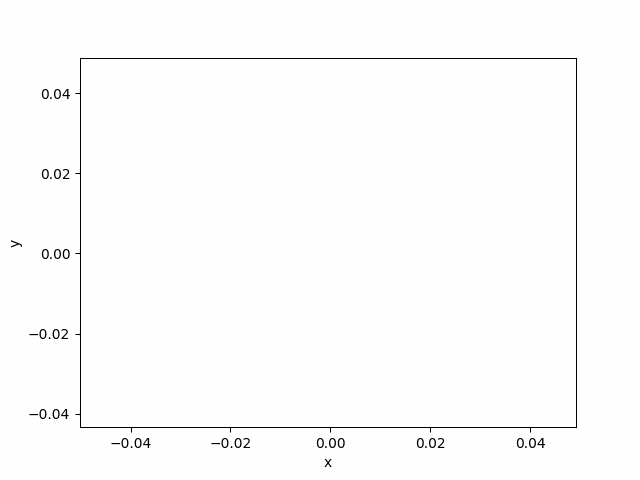

In [8]:

from heapq import heapify, heappop


vis=Visualizer()
vis.clear()

class Broom:
    def __init__(self, lines, lower_left, upper_right):
        self.lines = lines
        self.lower_left = lower_left
        self.upper_right = upper_right

        self.events = []
        self.sorted_lines = []

        for line in lines:
            self.events.append((line[0][0], line))
            self.events.append((line[1][0], line))
        heapify(self.events)

    def sweep(self):
        while len(self.events) > 0:
            current_event = heappop(self.events)
            if self.state(current_event):
                print("true")
                return True
        print("false")
        return False

    def check_intersection(self, line_1, line_2):
        orientation_10 = orientation(line_1[0], line_1[1], line_2[0])
        orientation_11 = orientation(line_1[0], line_1[1], line_2[1])
        orientation_20 = orientation(line_2[0], line_2[1], line_1[0])
        orientation_21 = orientation(line_2[0], line_2[1], line_1[1])

        return orientation_10 != orientation_11 and orientation_20 != orientation_21

    def state(self, event):
        if event[0] == event[1][0][0]:
            vis.add_point([event[1][0]], color='red')
            vis.add_line_segment(list(self.lines))
            vis.add_line_segment([(event[1][0], event[1][1])], color='green')
            vis.add_line_segment([((event[0], self.lower_left[1]), (event[0], self.upper_right[1]))], color='red')
            return self.add_line(event[1])
        else:
            vis.add_point([event[1][1]], color='red')
            vis.add_line_segment(self.lines)
            vis.add_line_segment([(event[1][0], event[1][1])], color='green')
            vis.add_line_segment([((event[0], self.lower_left[1]), (event[0], self.upper_right[1]))], color='red')
            return self.remove_line(event[1])

    def add_line(self, line):
        self.sorted_lines.append(line)
        self.sorted_lines.sort()
        index = self.sorted_lines.index(line)
        #print(self.sorted_lines)

        if index - 1 >= 0 or index + 1 < len(self.sorted_lines):
            return self.check_intersection(self.sorted_lines[index - 1], line)

    def remove_line(self, line):
        index = self.sorted_lines.index(line)

        if index - 1 >= 0 and index + 1 < len(self.sorted_lines):
            return self.check_intersection(self.sorted_lines[index - 1], self.sorted_lines[index + 1])
        else:
            self.sorted_lines.remove(line)


broom_1 = Broom(section1, (0,0.04), (0,0.04))
broom_1.sweep()
vis.show_gif(interval=400)


true


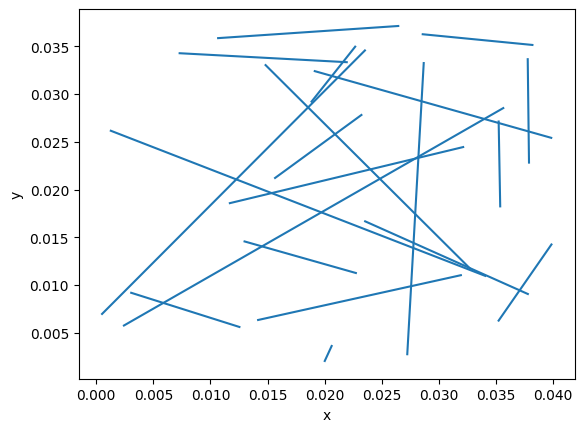

In [9]:
broom_1 = Broom(section, (0,1000), (0,1000))
broom_1.sweep()
vis=Visualizer()
vis.clear()
vis.add_line_segment(section)
vis.show()

In [10]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def intersection(line_1, line_2):
    orientation_10 = orientation(line_1[0], line_1[1], line_2[0])
    orientation_11 = orientation(line_1[0], line_1[1], line_2[1])

    orientation_20 = orientation(line_2[0], line_2[1], line_1[0])
    orientation_21 = orientation(line_2[0], line_2[1], line_1[1])

    return orientation_10 != orientation_11 and orientation_20 != orientation_21
    

def line_sweep(segments):
    events = []
    for segment in segments:
        events.append((segment[0], 'start', segment))
        events.append((segment[1], 'end', segment))

    events.sort()

    active_segments = set()

    intersections = []

    for event in events:
        point, event_type, segment = event
        if event_type == 'start':
            for active_segment in active_segments:
                if intersection(segment, active_segment):
                    intersections.append((point, active_segment, segment))
            active_segments.add(segment)
        else:
            active_segments.remove(segment)

    return intersections

[((0.0011942194874112167, 0.026202012547577626), ((0.0004488952752377884, 0.006903181179599791), (0.02358822020418866, 0.03464899470095087)), ((0.0011942194874112167, 0.026202012547577626), (0.03413631427399621, 0.010927723139373012))), ((0.0023489914625776233, 0.005713691474201808), ((0.0011942194874112167, 0.026202012547577626), (0.03413631427399621, 0.010927723139373012)), ((0.0023489914625776233, 0.005713691474201808), (0.035713362078007814, 0.028590498846821664))), ((0.002977902424904415, 0.009227030741267517), ((0.0023489914625776233, 0.005713691474201808), (0.035713362078007814, 0.028590498846821664)), ((0.002977902424904415, 0.009227030741267517), (0.012624017196552902, 0.005582792653493543))), ((0.011611839695437824, 0.018556065687575906), ((0.0011942194874112167, 0.026202012547577626), (0.03413631427399621, 0.010927723139373012)), ((0.011611839695437824, 0.018556065687575906), (0.03221326554928021, 0.024480125040948125))), ((0.011611839695437824, 0.018556065687575906), ((0.00

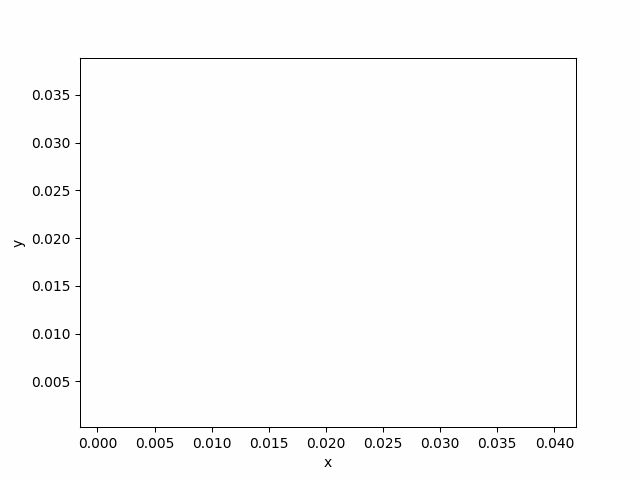

In [11]:
print(line_sweep(section))
vis=Visualizer()
vis.clear()
vis.add_line_segment(section)
for el in line_sweep(section):
    i=0
    for el2 in el:
        if i%3==0:
            vis.add_point(el2)
        else:
            
            vis.add_point(el2[0])
            vis.add_point(el2[1])
            
        i+=1
        print(el2,len(el2))

vis.show_gif()